In [29]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [30]:
dataset = np.array(pd.read_csv('HW3Data.csv',header = -1))

y=dataset[:, 0]

X=dataset[:, 1:]
print(X)

[[ 2.080754  1.099069  0.927763 ..., -0.148522  1.591533 -0.217481]
 [ 1.109457  0.786453  0.44556  ...,  1.09401  -0.492141 -1.554079]
 [-0.67653   1.6931    1.559247 ..., -0.086285 -0.390878 -0.089465]
 ..., 
 [ 0.200706 -0.668545 -0.935933 ...,  0.605018  1.344914 -2.485066]
 [ 0.829749  0.299447  0.130738 ...,  0.98563  -0.210661 -0.391249]
 [ 0.566684 -0.53366  -0.761951 ..., -0.45384   0.194535  0.06415 ]]


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=4)

In [32]:
from sklearn import datasets
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(x_train)
x_train_transformed = sc.transform(x_train)
x_test_transformed = sc.transform(x_test)

Optimal number of features : 2000


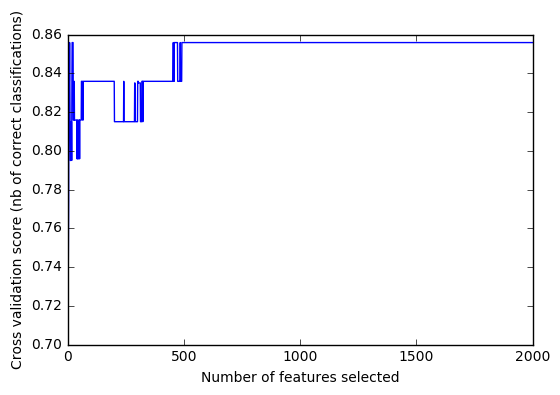

In [33]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [34]:
svc.fit(x_train, y_train)
print('Test Accuracy: %.3f' % svc.score(x_test, y_test))
y_pred = svc.predict(x_test)


Test Accuracy: 0.846
